# Search-based Path Planning

In [1]:
from Sampling_based_Planning.rrt_2D.rrt import Rrt
from Sampling_based_Planning.rrt_2D.rrt_star import RrtStar
from Sampling_based_Planning.rrt_2D import plotting, env
import time

Define the start and goal:

In [2]:
x_start = (2, 2)  # Starting node
x_goal = (49, 24)  # Goal node

Define the objects of path planning search-based methods

In [3]:
rrt = Rrt(x_start, x_goal, 0.5, 0.05, 10000)
rrt_star = RrtStar(x_start, x_goal, step_len=10, goal_sample_rate=0.1, search_radius=20, iter_max=10000)

Run RRT

Computation time: 0.3898179531097412 secs
Total distance: 67.25566199695015 m


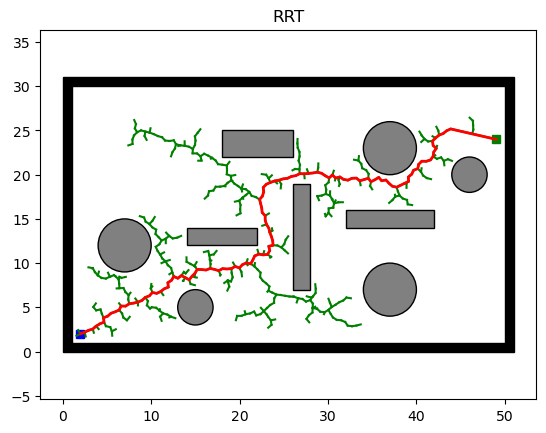

In [4]:
ts = time.time()
path_rrt = rrt.planning()
tf = time.time()
T_rrt = tf-ts
total_distance_rrt = rrt.plotting.get_distance_path(path_rrt)
print(f"Computation time: {T_rrt} secs")
print(f"Total distance: {total_distance_rrt} m")
rrt.plotting.plot_grid("RRT")
rrt.plotting.plot_visited(rrt.vertex, False)
rrt.plotting.plot_path(path_rrt)

Run RRT*

Computation time: 244.616144657135 secs
Total distance: 58.30190035195627 m


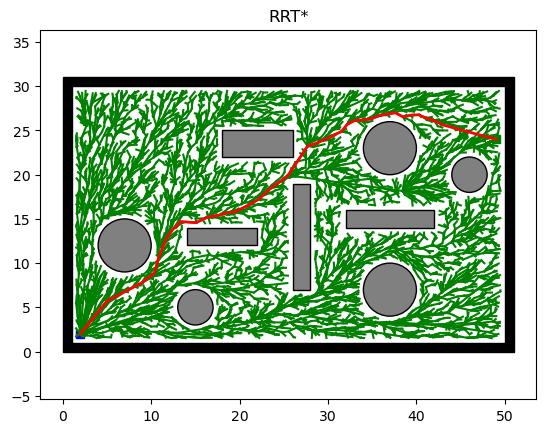

In [5]:
ts = time.time()
rrt_star.planning()
tf = time.time()
T_rrt_star = tf-ts
total_distance_rrt_star = rrt_star.plotting.get_distance_path(rrt_star.path)
print(f"Computation time: {T_rrt_star} secs")
print(f"Total distance: {total_distance_rrt_star} m")
rrt_star.plotting.plot_grid("RRT*")
rrt_star.plotting.plot_visited(rrt_star.vertex, False)
rrt_star.plotting.plot_path(rrt_star.path)

Result and Analysis

In [6]:
def plot_metrics(list_time_duration, list_path_length, parameter_name):
    import matplotlib.pyplot as plt 
    # Convert data to list of lists
    values = list(list_time_duration.values())
    # Create boxplot
    plt.boxplot(values, labels=list_time_duration.keys())
    plt.xlabel(parameter_name)
    plt.ylabel('Time (secs)')
    plt.show()

    values = list(list_path_length.values())
    # Create boxplot
    plt.boxplot(values, labels=list_path_length.keys())
    plt.xlabel(parameter_name)
    plt.ylabel('Length (m)')
    plt.show()


Step Length

In [7]:
list_step_len = [5,10]
list_time_duration = {}
list_path_length = {}
N_experiment = 5
for step_len in list_step_len:
    list_time_duration[step_len] = []
    list_path_length[step_len] = []
    for i in range(N_experiment):
        rrt_star = RrtStar(x_start, x_goal, step_len=step_len, goal_sample_rate=0.1, search_radius=20, iter_max=8000)
        ts = time.time()
        rrt_star.planning()
        tf = time.time()
        T_rrt_star = tf-ts
        total_distance_rrt_star = rrt_star.plotting.get_distance_path(rrt_star.path)
        print("============================")
        print(f"Experiment-{i} Step Length: {step_len}")
        print(f"Computation time: {T_rrt_star} secs")
        print(f"Total distance: {total_distance_rrt_star} m")
        list_time_duration[step_len].append(T_rrt_star)
        list_path_length[step_len].append(total_distance_rrt_star)

Experiment-0 Step Length: 5
Computation time: 170.40496945381165 secs
Total distance: 57.78807202719859 m
Experiment-1 Step Length: 5
Computation time: 170.66330552101135 secs
Total distance: 58.600563091959835 m
Experiment-2 Step Length: 5
Computation time: 181.96079349517822 secs
Total distance: 58.037997534261365 m
Experiment-3 Step Length: 5
Computation time: 182.35153985023499 secs
Total distance: 57.42106944899178 m
Experiment-4 Step Length: 5
Computation time: 187.91366410255432 secs
Total distance: 57.632148843948556 m
Experiment-0 Step Length: 10
Computation time: 181.0149986743927 secs
Total distance: 56.47789915298009 m
Experiment-1 Step Length: 10
Computation time: 183.54428601264954 secs
Total distance: 57.56708541989297 m
Experiment-2 Step Length: 10
Computation time: 174.42637419700623 secs
Total distance: 61.56450984340041 m
Experiment-3 Step Length: 10
Computation time: 187.1426556110382 secs
Total distance: 58.919265494638644 m
Experiment-4 Step Length: 10
Computation

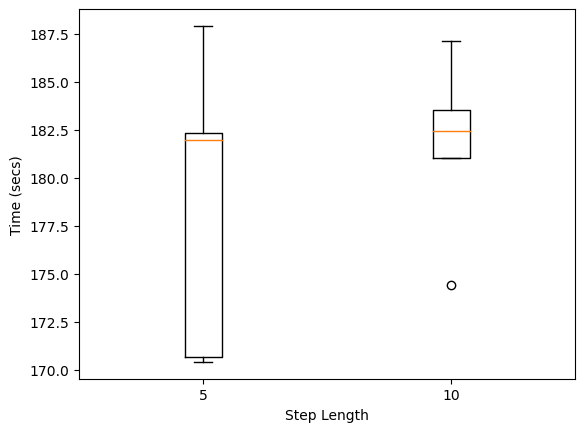

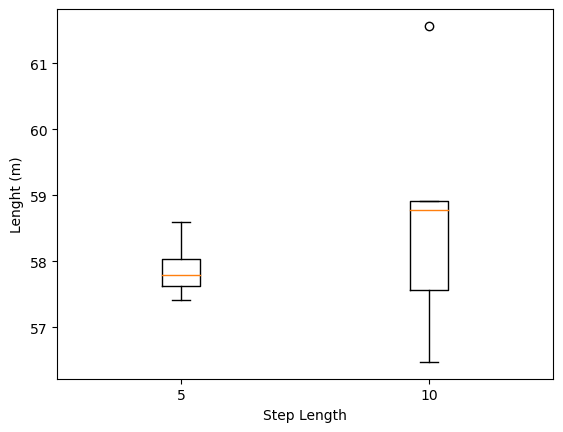

In [8]:
plot_metrics(list_time_duration, list_path_length, "Step Length")

Goal Sample Rate Analysis

In [9]:
list_goal_sample_rate = [0.1,0.3]
# ADD YOUR CODE HERE

Search Radius Analysis

In [10]:
list_search_radius = [10,20]
# ADD YOUR CODE HERE

NameError: name 'astar_m' is not defined